In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(42)

In [49]:
m = 20  # Number of agents
A = np.random.rand(m, m)  # Adjacency matrix 
K = np.random.rand(m)  # Stubbornness values
K_indices = np.random.choice(range(m), 1, replace=False)  # Indices for the non-zero values in K
K = np.zeros(m)
#K[K_indices] = 1  # Setting one element to 1, others remain 0
x_0 = np.random.rand(m)  # Initial opinions
max_iter = 200


# Stochastic adjacency matrix

Converged!


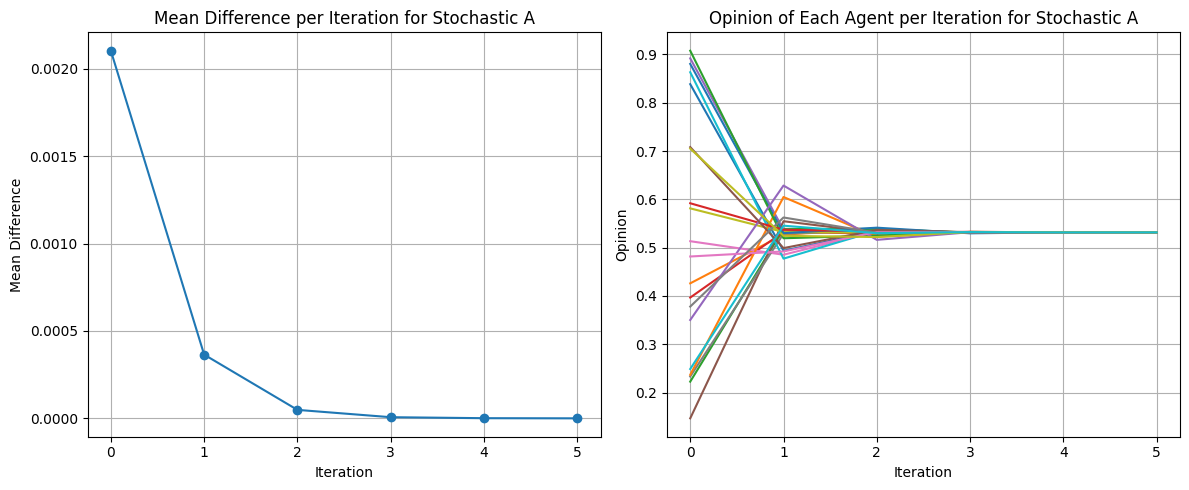

In [50]:
A_s = A / np.sum(A, axis=1, keepdims=True)
x = x_0
mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []
for t in range(max_iter):
    x_new = np.zeros(m)
    d = np.zeros(m)  # Weight matrix based on neighbors' opinions
    diff = []
    for i in range(m):
        for j in range(m):
            if A_s[i, j] > 0:  # neighbor
                d[i] += A_s[i, j] * (x[j] - x[i])**2
        d[i] = np.sqrt(d[i]) if d[i] > 0 else 1  # Handling zero division

    for i in range(m):
        x_new[i] = (np.sum(A_s[i, :] * x * d[i]) + K[i] * x_0[i]) / (d[i] + K[i])
    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))
    # Mean absolute difference 
    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x.copy())  # Append current opinions to the list
    # Check if mean diff is small
    if mean_diff < 1e-6:
        print("Converged!")
        break  # Exit loop if converged
    # Update opinions for the next iteration
    x = x_new

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for Stochastic A')
plt.grid(True)


plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for Stochastic A')
plt.grid(True)
plt.tight_layout() 
plt.show()

# Double Stochastic adjacency matrix

Converged!


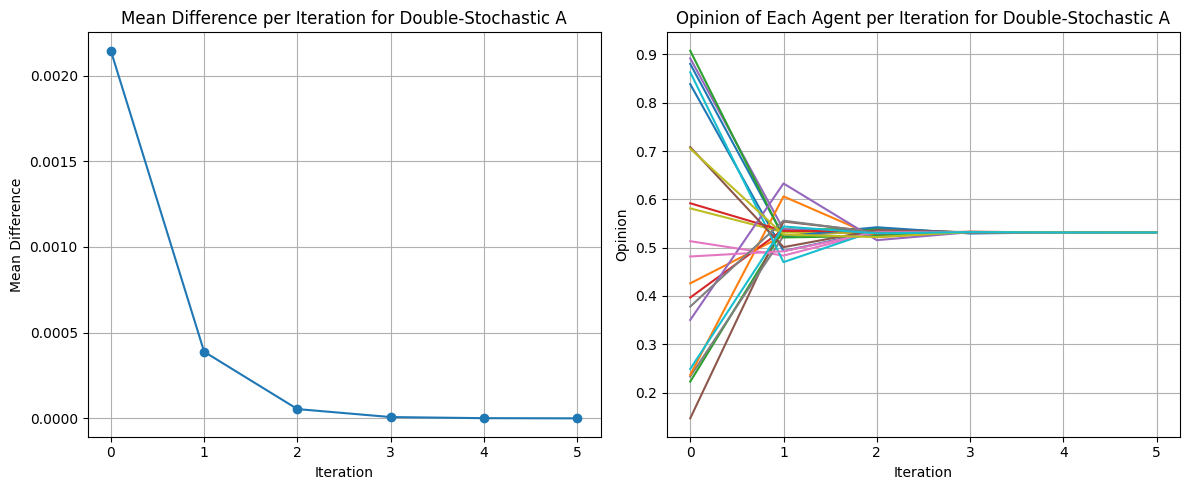

In [51]:
x = x_0
A_ds = A / np.sum(A, axis=0, keepdims=True) 
A_ds = A_ds / np.sum(A_ds, axis=1, keepdims=True) 
mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []

for t in range(max_iter):
    x_new = np.zeros(m)
    d = np.zeros(m)  # Weight matrix based on neighbors' opinions
    diff = []
    for i in range(m):
        for j in range(m):
            if A_ds[i, j] > 0:  # neighbor
                d[i] += A_ds[i, j] * (x[j] - x[i])**2
        d[i] = np.sqrt(d[i]) if d[i] > 0 else 1  # Handling zero division

    for i in range(m):
        x_new[i] = (np.sum(A_ds[i, :] * x * d[i]) + K[i] * x_0[i]) / (d[i] + K[i])
    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))
    # Mean absolute difference 
    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x.copy())  # Append current opinions to the list
    # Check if mean diff is small
    if mean_diff < 1e-6:
        print("Converged!")
        break  # Exit loop if converged
    # Update opinions for the next iteration
    x = x_new

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for Double-Stochastic A')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for Double-Stochastic A')
plt.grid(True)
plt.tight_layout() 
plt.show()

# Adjacency matrix changing with t

Converged!


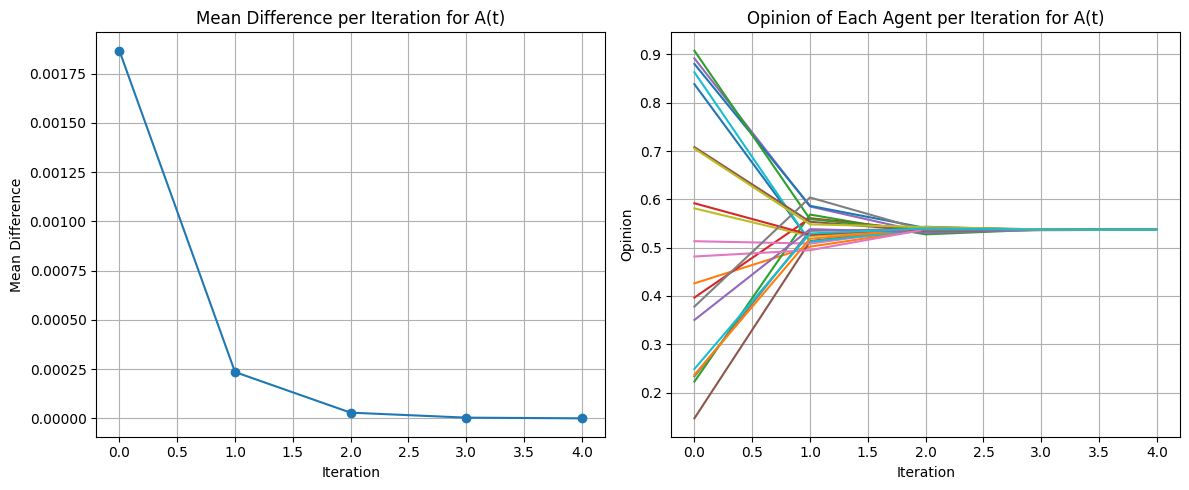

In [52]:
x = x_0
mean_diff_list = []  # To store mean difference per iteration
mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []

for t in range(max_iter):
    diff = []
    np.random.seed(t)
    A_t = np.random.rand(m, m)
    A_t = A_t / np.sum(A_t, axis=1, keepdims=True)  # Ensure row-stochastic
    x_new = np.zeros(m)
    d = np.zeros(m)  # Weight matrix based on neighbors' opinions
    for i in range(m):
        for j in range(m):
            if A_t[i, j] > 0:  # neighbor
                d[i] += A_t[i, j] * (x[j] - x[i])**2
        d[i] = np.sqrt(d[i]) if d[i] > 0 else 1  # Handling zero division

    for i in range(m):
        x_new[i] = (np.sum(A_t[i, :] * x * d[i]) + K[i] * x_0[i]) / (d[i] + K[i])
    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))
    # Mean absolute difference 
    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x.copy())  # Append current opinions to the list
    # Check if mean diff is small
    if mean_diff < 1e-6:
        print("Converged!")
        break  # Exit loop if converged
    # Update opinions for the next iteration
    x = x_new

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for A(t)')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for A(t)')
plt.grid(True)
plt.tight_layout() 
plt.show()

# Periodically Connected

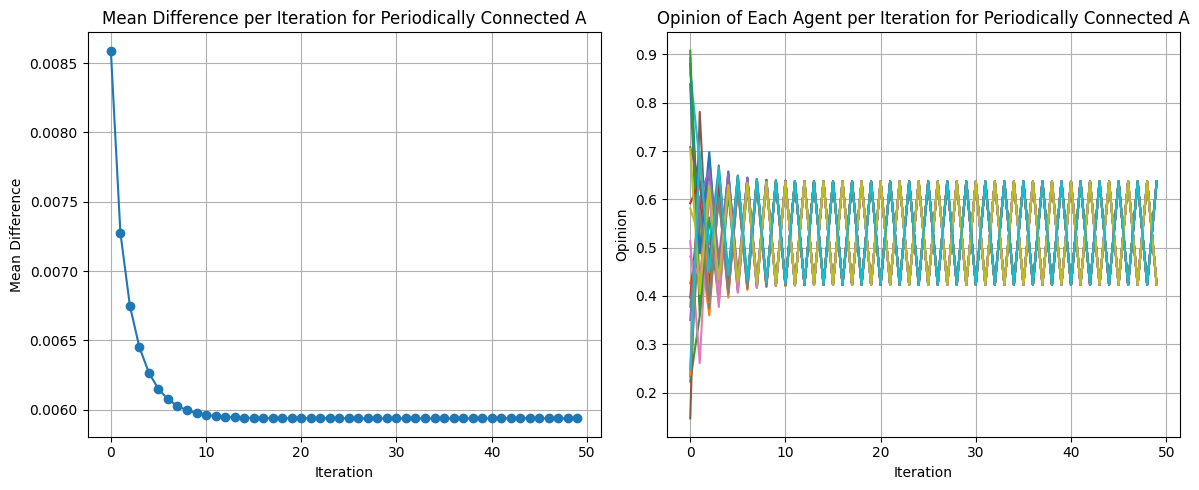

In [53]:
A_p = np.zeros((m, m))  # Initialize adjacency matrix as zeros
period = 5  # Periodicity value

# Create periodically connected adjacency matrix
for i in range(m):
    for j in range(m):
        if j == (i + 1) % m or j == (i - 1) % m or j == (i + period) % m or j == (i - period) % m:
            A_p[i, j] = 1

A_p = A_p / np.sum(A_p, axis=1, keepdims=True)
x = x_0
mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []
for t in range(50):
    x_new = np.zeros(m)
    d = np.zeros(m)  # Weight matrix based on neighbors' opinions
    diff = []
    for i in range(m):
        for j in range(m):
            if A_p[i, j] > 0:  # neighbor
                d[i] += A_p[i, j] * (x[j] - x[i])**2
        d[i] = np.sqrt(d[i]) if d[i] > 0 else 1  # Handling zero division

    for i in range(m):
        x_new[i] = (np.sum(A_p[i, :] * x * d[i]) + K[i] * x_0[i]) / (d[i] + K[i])
    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))
    # Mean absolute difference 
    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x.copy())  # Append current opinions to the list
    # Check if mean diff is small
    if mean_diff < 1e-6:
        print("Converged!")
        break  # Exit loop if converged
    # Update opinions for the next iteration
    x = x_new

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for Periodically Connected A')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for Periodically Connected A')
plt.grid(True)
plt.tight_layout() 
plt.show()

# Strongely Connected

Converged!


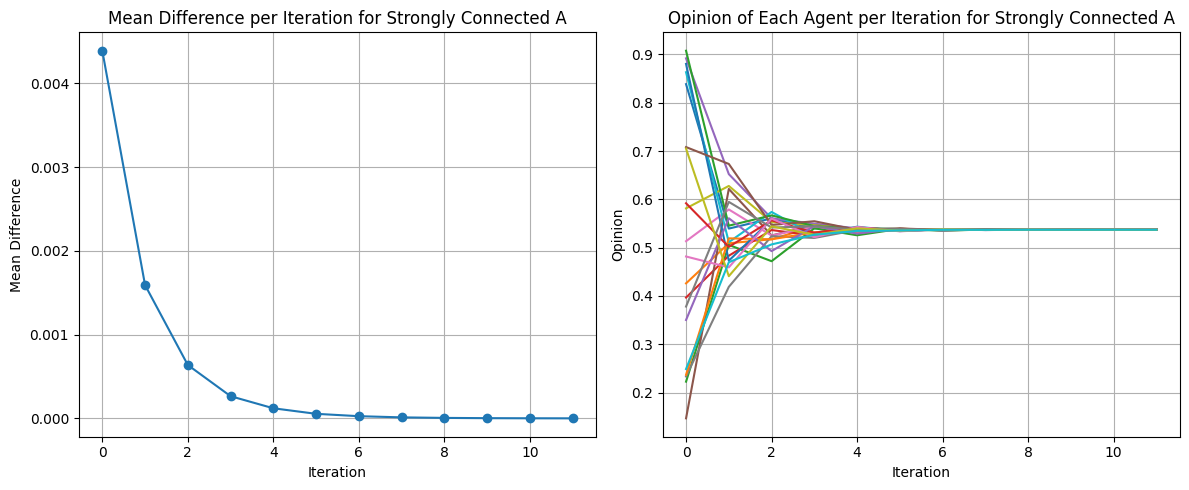

In [54]:
A_sc = np.zeros((m, m))  # Initialize adjacency matrix as zeros
x = x_0
# Create a random strongly connected adjacency matrix
connected = False
while not connected:
    A_sc = np.random.randint(2, size=(m, m))  # Generate a random binary matrix
    A_sc = np.triu(A_sc, k=1)  # Upper triangular part of the matrix
    A_sc = A_sc + A_sc.T  # Make the matrix symmetric
    G = np.zeros((m, m))  # Create a directed graph
    G[A > 0] = 1
    visited = np.zeros(m, dtype=bool)  # Keep track of visited nodes

    def dfs(node):
        visited[node] = True
        for neighbor in np.where(G[node] == 1)[0]:
            if not visited[neighbor]:
                dfs(neighbor)

    dfs(0)  # Start the DFS from the first node

    if np.all(visited):
        connected = True
A_sc = A_sc / np.sum(A_sc, axis=1, keepdims=True) 
mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []

for t in range(max_iter):
    x_new = np.zeros(m)
    d = np.zeros(m)  # Weight matrix based on neighbors' opinions
    diff = []

    for i in range(m):
        for j in range(m):
            if A_sc[i, j] > 0:  # neighbor
                d[i] += A_sc[i, j] * (x[j] - x[i]) ** 2
        d[i] = np.sqrt(d[i]) if d[i] > 0 else 1  # Handling zero division

    for i in range(m):
        x_new[i] = (np.sum(A_sc[i, :] * x * d[i]) + K[i] * x_0[i]) / (d[i] + K[i])

    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))

    # Mean absolute difference
    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x.copy())  # Append current opinions to the list

    # Check if mean diff is small
    if mean_diff < 1e-6:
        print("Converged!")
        break  # Exit loop if converged

    # Update opinions for the next iteration
    x = x_new

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for Strongly Connected A')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for Strongly Connected A')
plt.grid(True)
plt.tight_layout() 
plt.show()

# Gossip Algorithm

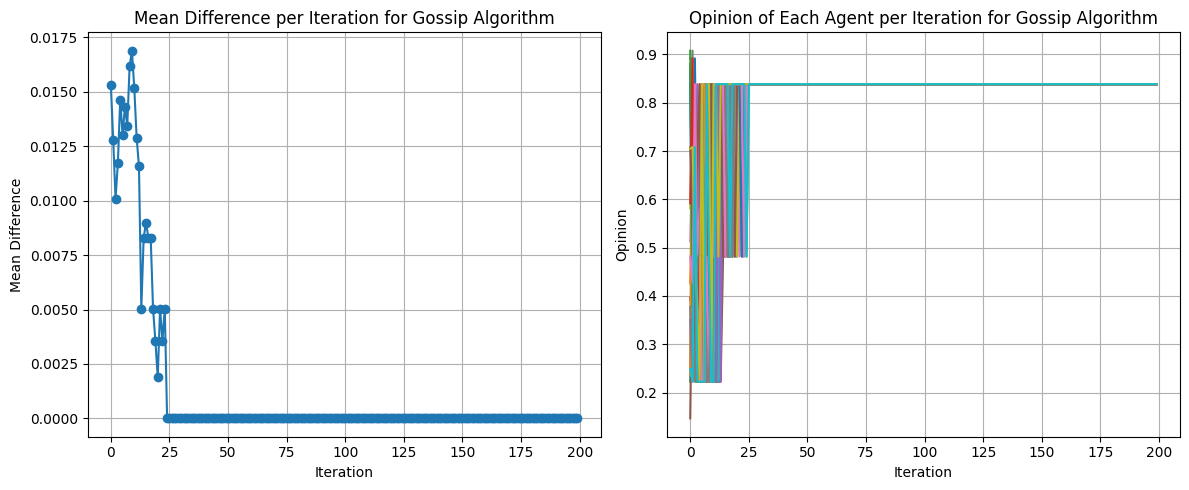

In [55]:
A_g = A / np.sum(A, axis=1, keepdims=True)  # Normalized adjacency matrix
x = x_0.copy()

mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []

for t in range(max_iter):
    x_new = np.zeros(m)
    diff = []

    # Perform gossip among agents
    for i in range(m):
        neighbors = [j for j in range(m) if A_g[i, j] > 0]  # Find neighbors of agent i
        if neighbors:
            neighbor = random.choice(neighbors)  # Randomly select a neighbor to share information
            x_new[i] = (1 - K[i]) * x[neighbor] + K[i] * x_0[i] 
        else:
            x_new[i] = x[i]  # If no neighbors, keep the current opinion

    # Calculate mean absolute difference
    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))

    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x.copy())  # Append current opinions to the list

    # Update opinions for the next iteration
    x = x_new

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for Gossip Algorithm')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for Gossip Algorithm')
plt.grid(True)
plt.tight_layout() 
plt.show()


# Broadcast 

Converged!


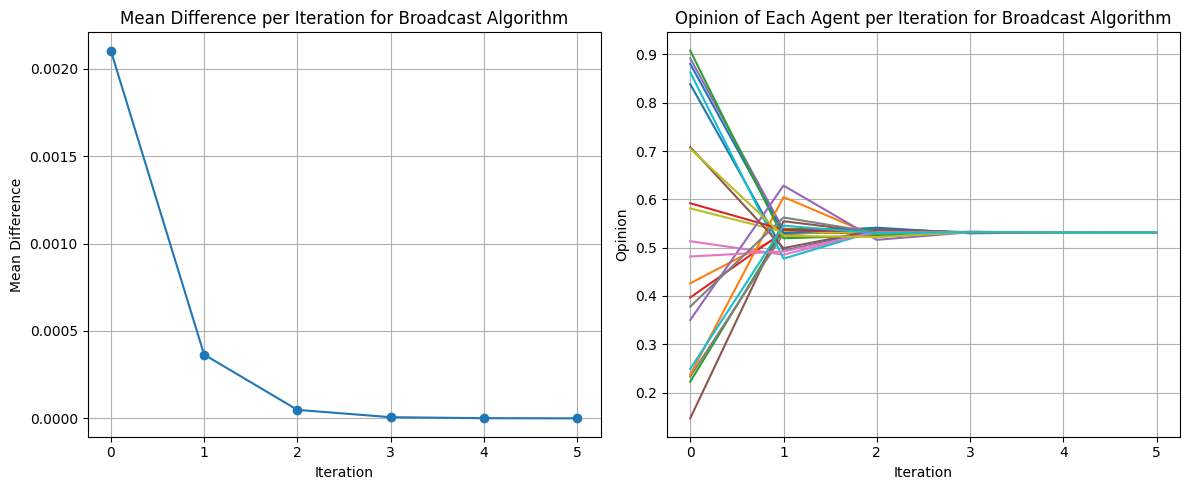

In [56]:
A_s = A / np.sum(A, axis=1, keepdims=True)
x = x_0
mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []

for t in range(max_iter):
    x_new = np.zeros(m)
    d = np.zeros(m)  # Weight matrix based on neighbors' opinions
    diff = []
    
    for i in range(m):
        for j in range(m):
            if A_s[i, j] > 0:  # neighbor
                d[i] += A_s[i, j] * (x[j] - x[i]) ** 2
        d[i] = np.sqrt(d[i]) if d[i] > 0 else 1  # Handling zero division

    for i in range(m):
        broadcast_effect = np.sum(A_s[i, :] * x * d[i]) 
        x_new[i] = (broadcast_effect + K[i] * x_0[i]) / (d[i] + K[i])

    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))

    # Mean absolute difference 
    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x.copy())  # Append current opinions to the list

    # Check if mean diff is small
    if mean_diff < 1e-6:
        print("Converged!")
        break  # Exit loop if converged

    # Update opinions for the next iteration
    x = x_new

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for Broadcast Algorithm')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for Broadcast Algorithm')
plt.grid(True)
plt.tight_layout() 
plt.show()


# DeGroot Model

Converged!


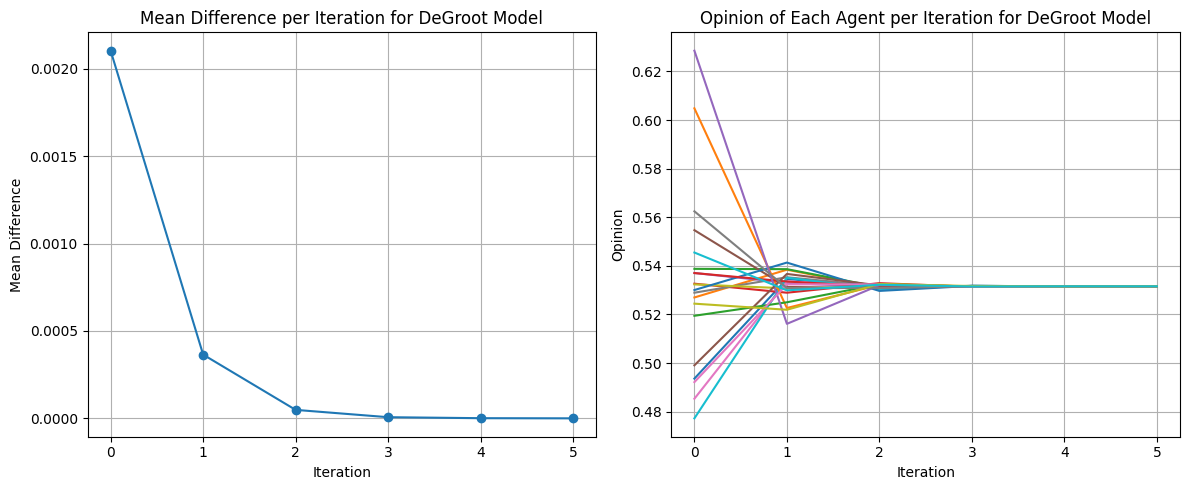

In [57]:
A_s = A / np.sum(A, axis=1, keepdims=True)
x = x_0
mean_diff_list = []  # To store mean difference per iteration
opinions_per_iteration = []

for t in range(max_iter):
    x_new = np.zeros(m)
    diff = []
    for i in range(m):
        neighbors = np.where(A_s[i] > 0)[0]  # Find neighbors of agent i
        x_new[i] = np.sum(A_s[i, neighbors] * x[neighbors]) / np.sum(A_s[i, neighbors])
        x_new[i] = (1 - K[i]) * x_new[i] + K[i] * x_0[i]  # Incorporate stubbornness
    for i in range(m):
        for j in range(m):
            if i != j:  # Ensure i and j are different agents
                diff.append(np.abs(x_new[i] - x_new[j]) / (m - 1))
    
    mean_diff = np.mean(diff)
    mean_diff_list.append(mean_diff)  # Append mean difference to list
    opinions_per_iteration.append(x_new.copy())  # Append current opinions to the list

    if mean_diff < 1e-6:
        print("Converged!")
        break  # Exit loop if converged

    x = x_new  # Update opinions for the next iteration

# Plotting 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(mean_diff_list)), mean_diff_list, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Difference')
plt.title('Mean Difference per Iteration for DeGroot Model')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(m):
    plt.plot(np.arange(len(opinions_per_iteration)), [opinions[i] for opinions in opinions_per_iteration])
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.title('Opinion of Each Agent per Iteration for DeGroot Model')
plt.grid(True)
plt.tight_layout() 
plt.show()